### This notebook briefly demonstrates the effect of changing the parameters determining the non-parametric image update schedule.

The relevant line in the GALFITM feedme file looks like this:

U) $n$ $a$ $b$ $c$ $d$ $r$ $t$

e.g. the defaults are,

U) 3 0.75 25 4 40 0.0 1.0

which can be selected with the shorthand

U) 1

Every $n$ iterations, the nonparametric image is updated
using a fraction of the filtered residuals, $npf$:
$$npf = \frac{a \times b^c}{b^c + |i - d|^c},$$
where $i$ is the iteration number.

If $n$ is negative the SED homogenisation procedure is not applied.

$r$ is a radius around each object centre to exclude from the non-parametric image.

$t$ is a factor to modify the filtering threshold (e.g. increasing the amount of structure taken into the non-parametric image, but also potentially including some noise.)

The considerations in this function are following:
* we want the chi-sq minimization to find a reasonable first parametric model fit before we start taking much out to the non-parametric image,
* then we want to gradually take structure out into the non-parametric image, giving time for the chi-sq minimisation to adjust to the changing data,
* once this procedure is well underway we need a period of fairly high $npf$, in order to remove all the structure into the non-parametric image,
* finally, in order for the chi-sq minimisation to converge we need to stop changing the data, so we reduce $npf$ to zero.

A better function may well exist.  Even for this function, the best set of parameters is not entirely clear; it may depend on the properties of the data being fit.  The defaults seem to do a reasonable job, but have not been particularly optimised.

In [1]:
# set up plotting
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 5.0)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.size'] = 16

In [2]:
def npf(i, a, b, c, d):
    return a * b**c / (b**c + np.abs(i-d)**c)

The following figure shows the behaviour of the chosen function and demonstrates how the $npf$ schedule changes depending on the supplied parameters.

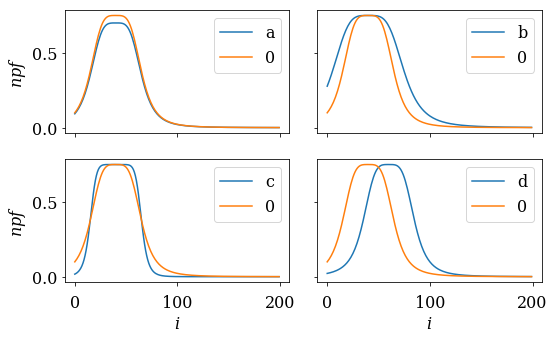

In [3]:
i = np.arange(200)
fig, axarr = plt.subplots(2, 2, sharex=True, sharey=True)
axarr[0,0].plot(i, npf(i, 0.70, 25.0, 4.0, 40.0), label='a')
axarr[0,1].plot(i, npf(i, 0.75, 35.0, 4.0, 40.0), label='b')
axarr[1,0].plot(i, npf(i, 0.75, 25.0, 8.0, 40.0), label='c')
axarr[1,1].plot(i, npf(i, 0.75, 25.0, 4.0, 60.0), label='d')
for ax in axarr.flat:
    ax.plot(i, npf(i, 0.75, 25.0, 4.0, 40.0), label='0')
    ax.legend()
for ax in axarr[:,0]:
    ax.set_ylabel('$npf$')
for ax in axarr[1]:
    ax.set_xlabel('$i$')
plt.tight_layout()

Say we need to give the parametric model more time to adjust in order to produce an overall better outcome at the expense of a longer fitting time.  Then, we want the update of the non-parametric function to be delayed and over a longer period.  We might do the following, perhaps also increasing $n$ to 4 or 5.

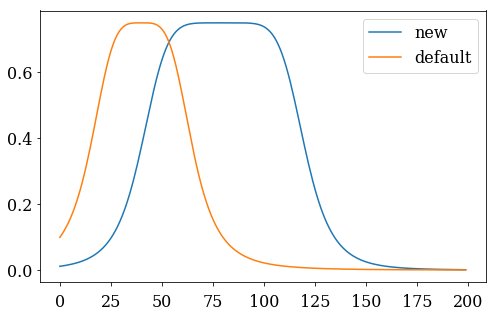

In [4]:
plt.plot(i, npf(i, 0.75, 40.0, 6.0, 80.0), label='new')
plt.plot(i, npf(i, 0.75, 25.0, 4.0, 40.0), label='default')
plt.legend()

Note that the amount of the filtered residuals ultimately taken into the non-parametric image is approximately:
$1 - (1-a)^{b/n}$
so you need this quantity to be close to one.

For example, with the defaults:
$1 - (1-0.75)^{25/3} = 0.99999$,
which is fine.  However, if $n=10$ (as in an old example):
$1 - (1-0.75)^{25/10} = 0.96875$,
which implies that a few percent of the residual structure may be unaccounted for.